# Long Data Format with Python Pandas


<div style="width:200px;margin-top:20px;"><img src="images/py_reshape.png" style="text-align:left"/></div>


## Data Analytics Structure

<ul style="font-size:20px;line-height:28px;">
     <li>Datasets or data frames typically two-dimensions: row x column</li>
     <li>Formats can vary with wide (many columns) or long (many rows)</li>    
     <li>Long formats generally preferred for analytical operations <br/>(merging, aggregation, modeling, and plotting).</li>    
</ul>

---

## Example Data: 
### U.S. EPA Greenhouse Gases

<span style="font-size:18px"><a href="https://cfpub.epa.gov/ghgdata/inventoryexplorer/index.html">https://cfpub.epa.gov/ghgdata/inventoryexplorer/index.html</a></span>

In [63]:
%%html
<style>.prompt{width: 100px; min-width: 0; visibility: collapse}</style>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

sns.set()

## Wide Format

<ul style="font-size:20px;line-height:28px;">
   <li>Digestable as an end-use report</li>
   <li>Difficult in data manipulation</li>
   <li>Data element, year, is used as column headers</li>
</ul>

In [4]:
ghg_ipcc_sectors_df = pd.read_csv("data/us_epa_ghg_invent_sectors_all.csv")

ghg_ipcc_sectors_df

,IPCC Sector,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Energy,5338.091042,5300.215198,5400.058415,5490.869980,5580.355658,5626.904263,5813.942043,5883.945384,5926.087316,...,5698.313317,5875.464250,5725.246291,5513.556359,5664.906055,5704.031225,5550.063875,5421.565488,5383.842273,5547.207939
1,Agriculture,554.354510,545.650892,546.502022,574.472050,561.375866,573.798360,581.049346,569.178789,577.087730,...,586.860824,594.998265,575.955529,558.343920,598.930253,608.551849,614.566925,600.533366,602.271276,618.501739
2,Industrial processes,345.554232,325.828503,331.794826,331.504081,343.733501,374.731714,387.223919,392.619025,400.957262,...,322.597212,364.114259,381.159088,369.387352,369.903348,380.799457,377.086585,370.386034,370.692294,376.501555
3,Waste,199.000347,201.565109,201.731324,199.928443,200.265446,195.581303,192.191736,183.061438,173.617956,...,146.134734,147.036271,138.172562,139.387186,135.811374,135.634125,134.654042,131.595550,131.428796,134.438384
4,"Land use, land-use change, and forestry",-853.370408,-858.253414,-842.500034,-828.547389,-844.446634,-813.407071,-839.210807,-815.317888,-817.712640,...,-760.991487,-740.526979,-792.961775,-781.465332,-777.524536,-723.010289,-775.543643,-788.946601,-763.943826,-773.496359
5,Gross total,6437.000131,6373.259703,6480.086588,6596.774554,6685.730471,6771.015640,6974.407044,7028.804635,7077.750264,...,6753.906086,6981.613045,6820.533469,6580.674816,6769.551029,6829.016655,6676.371427,6524.080438,6488.234640,6676.649617
6,Net total,5583.629723,5515.006290,5637.586554,5768.227165,5841.283836,5957.608570,6135.196238,6213.486747,6260.037623,...,5992.914599,6241.086066,6027.571694,5799.209484,5992.026493,6106.006366,5900.827784,5735.133837,5724.290814,5903.153258


## Long Format

<ul style="font-size:20px;line-height:28px">
    <li>Stores with less meta data</li>
    <li>Vectorized calculates without loops</li>
    <li>Merging and appending with better scale</li>
    <li>Aggregates with visible groups/types</li>
    <li>Plots better with facets</li>
</ul>

### Method 1: <code>pd.melt</code>

In [67]:
ghg_ipcc_sectors_long_df = pd.melt(ghg_ipcc_sectors_df, 
                                   id_vars="IPCC Sector", 
                                   var_name="Year", 
                                   value_name="Emissions")

ghg_ipcc_sectors_long_df.head()

,IPCC Sector,Year,Emissions
0,Energy,1990,5338.091042
1,Agriculture,1990,554.354510
2,Industrial processes,1990,345.554232
3,Waste,1990,199.000347
4,"Land use, land-use change, and forestry",1990,-853.370408


In [68]:
ghg_ipcc_sectors_long_df.tail()

,IPCC Sector,Year,Emissions
198,Industrial processes,2018,376.501555
199,Waste,2018,134.438384
200,"Land use, land-use change, and forestry",2018,-773.496359
201,Gross total,2018,6676.649617
202,Net total,2018,5903.153258


### Method 2: <code>pd.wide_to_long</code>

In [69]:
ghg_ipcc_sectors_long_df = (pd.wide_to_long(ghg_ipcc_sectors_df, stubnames='',
                                            i="IPCC Sector", j="Year")
                              .reset_index()
                              .set_axis(['IPCC Sector', 'Year', 'Emisions'], 
                                        axis='columns', inplace=False)
                           )

ghg_ipcc_sectors_long_df.sample(5)

,IPCC Sector,Year,Emisions
202,Net total,2018,5903.153258
176,Agriculture,2015,614.566925
194,Gross total,2017,6488.234640
75,Gross total,2000,7275.396969
187,Gross total,2016,6524.080438


## Multiple Groupings
### Inventory Sector and GHG by Year

In [80]:
files = {'Carbon Dioxide': 'data/us_epa_ghg_invent_sectors_co2.csv',
         'Methane': 'data/us_epa_ghg_invent_sectors_ch4.csv',
         'Nitrous Oxide': 'data/us_epa_ghg_invent_sectors_no2.csv',
         'Fluorinated Gases': 'data/us_epa_ghg_invent_sectors_fl.csv'}

ghg_inv_sectors_df = pd.concat(
    [pd.read_csv(s).assign(Gas=f).rename({'Inventory Sector': 'Sector'}, axis='columns')
           for f,s in files.items()],
    ignore_index=True
)

ghg_inv_sectors_df.head()

,Sector,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Gas
0,Energy,4909.296267,4869.796472,4970.910848,5073.934129,5159.350868,5212.458801,5399.649241,5472.056847,5522.369199,...,5518.030553,5381.756382,5185.048407,5331.564449,5375.404269,5231.530223,5119.841455,5081.320836,5249.294883,Carbon Dioxide
1,Industrial processes,212.326387,202.132507,205.221572,203.435676,211.194477,219.699578,220.631759,225.010803,221.455823,...,171.876758,176.156456,172.792597,174.787367,178.782915,173.083063,165.303796,164.691077,167.841124,Carbon Dioxide
2,Agriculture,6.677963,6.960597,6.574299,6.067790,6.487364,6.747325,6.630901,6.639319,7.226958,...,8.148468,7.381563,9.727550,7.677479,7.532033,7.818909,7.122311,7.594217,7.745495,Carbon Dioxide
3,"Land use, land-use change, and forestry",-860.746790,-865.950149,-849.431551,-835.472031,-852.614966,-820.707183,-847.940418,-822.281090,-825.299142,...,-751.970588,-805.232675,-803.212434,-788.708438,-739.564948,-802.928850,-801.734406,-790.018582,-799.621523,Carbon Dioxide
4,Total,4267.553826,4212.939427,4333.275169,4447.965564,4524.417742,4618.198521,4778.971483,4881.425878,4925.752838,...,4946.085192,4760.061726,4564.356121,4725.320856,4822.154268,4609.503344,4490.533155,4463.587548,4625.259980,Carbon Dioxide


In [81]:
ghg_inv_sectors_df.tail()

,Sector,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Gas
14,"Land use, land-use change, and forestry",2.974107,3.102787,3.012830,3.125836,3.629173,3.315025,4.074230,3.244095,3.291694,...,4.906805,5.506586,9.072055,4.824796,7.007423,11.248827,5.485143,10.827539,10.879524,Nitrous Oxide
15,Waste,3.723427,3.846809,3.986192,4.159949,4.404799,4.517357,4.690292,4.799593,4.990579,...,6.173828,6.186461,6.352068,6.491846,6.643088,6.663434,6.902046,7.153689,7.204620,Nitrous Oxide
16,Total,437.598375,427.931074,427.360967,455.496379,441.189237,452.572570,464.931152,449.906835,450.281190,...,436.330576,427.362255,401.335048,444.000037,456.272597,455.070129,431.552543,432.086474,445.408079,Nitrous Oxide
17,Industrial processes,99.665712,90.681299,95.277722,95.003732,98.976937,117.854321,129.007715,136.601354,153.009033,...,169.797165,177.112953,174.013124,173.888957,179.021155,181.635104,181.500688,183.065108,182.782432,Fluorinated Gases
18,Total,99.665712,90.681299,95.277722,95.003732,98.976937,117.854321,129.007715,136.601354,153.009033,...,169.797165,177.112953,174.013124,173.888957,179.021155,181.635104,181.500688,183.065108,182.782432,Fluorinated Gases


## Questions

<ul style="font-size:20px;line-height:28px;">
   <li>What is overall average or median by Greenhouse Gas? By Sector? By both?</li>
   <li>What is yearly average or median by Greenhouse Gas? By Sector? By both?</li>
   <li>What are the time trends by Greenhouse Gas? By Sector? By both?</li>
</ul>

## Answers

<ul style="font-size:20px;line-height:28px;">
    <li>With Long Data: <b><code>pd.melt</code> + <code>DataFrame.groupby</code></b></li>
</ul>


In [72]:
ghg_inv_sectors_long_df = (ghg_inv_sectors_df.melt(id_vars = ['Gas', 'Sector'],
                                                   var_name = 'Year',
                                                   value_name = 'Emissions')
                                             .assign(Year = lambda x: x['Year'].astype(int))
                          )

ghg_inv_sectors_long_df.head(10)

,Gas,Sector,Year,Emissions
0,Carbon Dioxide,Energy,1990,4909.296267
1,Carbon Dioxide,Industrial processes,1990,212.326387
2,Carbon Dioxide,Agriculture,1990,6.677963
3,Carbon Dioxide,"Land use, land-use change, and forestry",1990,-860.746790
4,Carbon Dioxide,Total,1990,4267.553826
5,Methane,Energy,1990,361.217909
6,Methane,Agriculture,1990,217.624814
7,Methane,Waste,1990,195.276920
8,Methane,"Land use, land-use change, and forestry",1990,4.402275
9,Methane,Industrial processes,1990,0.289891


In [73]:
ghg_inv_sectors_long_df.tail(10)

,Gas,Sector,Year,Emissions
541,Methane,Industrial processes,2018,0.337142
542,Methane,Total,2018,649.702767
543,Nitrous Oxide,Agriculture,2018,357.776843
544,Nitrous Oxide,Energy,2018,44.006236
545,Nitrous Oxide,Industrial processes,2018,25.540857
546,Nitrous Oxide,"Land use, land-use change, and forestry",2018,10.879524
547,Nitrous Oxide,Waste,2018,7.204620
548,Nitrous Oxide,Total,2018,445.408079
549,Fluorinated Gases,Industrial processes,2018,182.782432
550,Fluorinated Gases,Total,2018,182.782432


## Overall

In [85]:
agg_df = ghg_inv_sectors_long_df['Emissions'].agg(['min', 'median', 'mean', 'max', 'std'])

agg_df.to_frame()

,Emissions
min,-865.950149
median,150.670267
mean,643.556219
max,5930.296122
std,1569.727665


## By Sector

In [86]:
agg_df = ghg_inv_sectors_long_df.groupby(['Sector'])['Emissions'].agg(['min', 'median', 'mean', 'max', 'std'])

agg_df

,min,median,mean,max,std
Sector,,,,,
Agriculture,6.067790,238.218594,193.121832,366.734077,138.417971
Energy,44.006236,297.810167,1932.535455,5930.296122,2492.889822
Industrial\nprocesses,0.076000,63.939387,91.850582,225.010803,83.117971
"Land use, land-\nuse change, and\nforestry",-865.950149,4.218312,-264.174581,16.136380,386.107325
Total,90.681299,548.239301,1528.446019,5338.927711,1926.441834
Waste,3.723427,65.739864,80.966816,197.745132,78.066430


## By Greenhouse Gas

In [75]:
agg_df = ghg_inv_sectors_long_df.groupby(['Gas'])['Emissions'].agg(['min', 'median', 'mean', 'max', 'std'])

agg_df

,min,median,mean,max,std
Gas,,,,,
Carbon Dioxide,-865.950149,196.229468,1928.041167,5930.296122,2654.233619
Fluorinated Gases,90.681299,150.670267,147.358949,183.065108,29.141301
Methane,0.076000,207.684973,235.238722,783.454491,239.829964
Nitrous Oxide,2.974107,40.601855,146.868682,464.931152,175.040293


## By Year

In [76]:
agg_df = ghg_inv_sectors_long_df.groupby(['Year'])['Emissions'].agg(['min', 'median', 'mean', 'max', 'std'])

agg_df

,min,median,mean,max,std
Year,,,,,
1990,-860.746790,99.665712,587.750497,4909.296267,1446.915954
1991,-865.950149,90.681299,580.526978,4869.796472,1433.530084
1992,-849.431551,95.277722,593.430164,4970.910848,1466.180840
1993,-835.472031,95.003732,607.181807,5073.934129,1498.361474
1994,-852.614966,98.976937,614.871983,5159.350868,1524.182496
1995,-820.707183,117.854321,627.116692,5212.458801,1543.664861
1996,-847.940418,129.007715,645.810130,5399.649241,1598.483043
1997,-822.281090,136.601354,654.051237,5472.056847,1624.068799
1998,-825.299142,153.009033,658.951329,5522.369199,1638.582470


## By Sector and GHG

In [77]:
agg_df = (ghg_inv_sectors_long_df.groupby(['Sector', 'Gas'])['Emissions']
                                 .agg(['min', 'median', 'mean', 'max', 'std']))
         
agg_df

min  \
Sector                                  Gas                              
Agriculture                             Carbon Dioxide        6.067790   
                                        Methane             217.624814   
                                        Nitrous Oxide       309.368730   
Energy                                  Carbon Dioxide     4869.796472   
                                        Methane             253.906820   
                                        Nitrous Oxide        44.006236   
Industrial processes                    Carbon Dioxide      143.484358   
                                        Fluorinated Gases    90.681299   
                                        Methane               0.076000   
                                        Nitrous Oxide        18.825769   
Land use, land-use change, and forestry Carbon Dioxide     -865.950149   
                                        Methane               3.719107   
                                        Nitrous Oxide         2.974107   
Total                                   Carbon Dioxide     4212.939427   
                                        Fluorinated Gases    90.681299   
                                        Methane             631.547450   
                                        Nitrous Oxide       401.335048   
Waste                                   Methane             124.275108   
                                        Nitrous Oxide         3.723427   

                                                                median  \
Sector                                  Gas                              
Agriculture                             Carbon Dioxide        7.273225   
                                        Methane             238.218594   
                                        Nitrous Oxide       332.344560   
Energy                                  Carbon Dioxide     5381.756382   
                                        Methane             297.810167   
                                        Nitrous Oxide        70.905669   
Industrial processes                    Carbon Dioxide      196.229468   
                                        Fluorinated Gases   150.670267   
                                        Methane               0.241681   
                                        Nitrous Oxide        25.144093   
Land use, land-use change, and forestry Carbon Dioxide     -805.232675   
                                        Methane               6.359106   
                                        Nitrous Oxide         5.485143   
Total                                   Carbon Dioxide     4778.971483   
                                        Fluorinated Gases   150.670267   
                                        Methane             697.913103   
                                        Nitrous Oxide       441.189237   
Waste                                   Methane             152.147813   
                                        Nitrous Oxide         6.055085   

                                                                  mean  \
Sector                                  Gas                              
Agriculture                             Carbon Dioxide        7.344037   
                                        Methane             237.091161   
                                        Nitrous Oxide       334.930296   
Energy                                  Carbon Dioxide     5425.537376   
                                        Methane             304.360937   
                                        Nitrous Oxide        67.708053   
Industrial processes                    Carbon Dioxide      193.490390   
                                        Fluorinated Gases   147.358949   
                                        Methane               0.234895   
                                        Nitrous Oxide        26.318094   
Land use, land-use change, and forestry Carbon Dioxide     -806.26888

## Plot with Facets and Hue: Two Groups

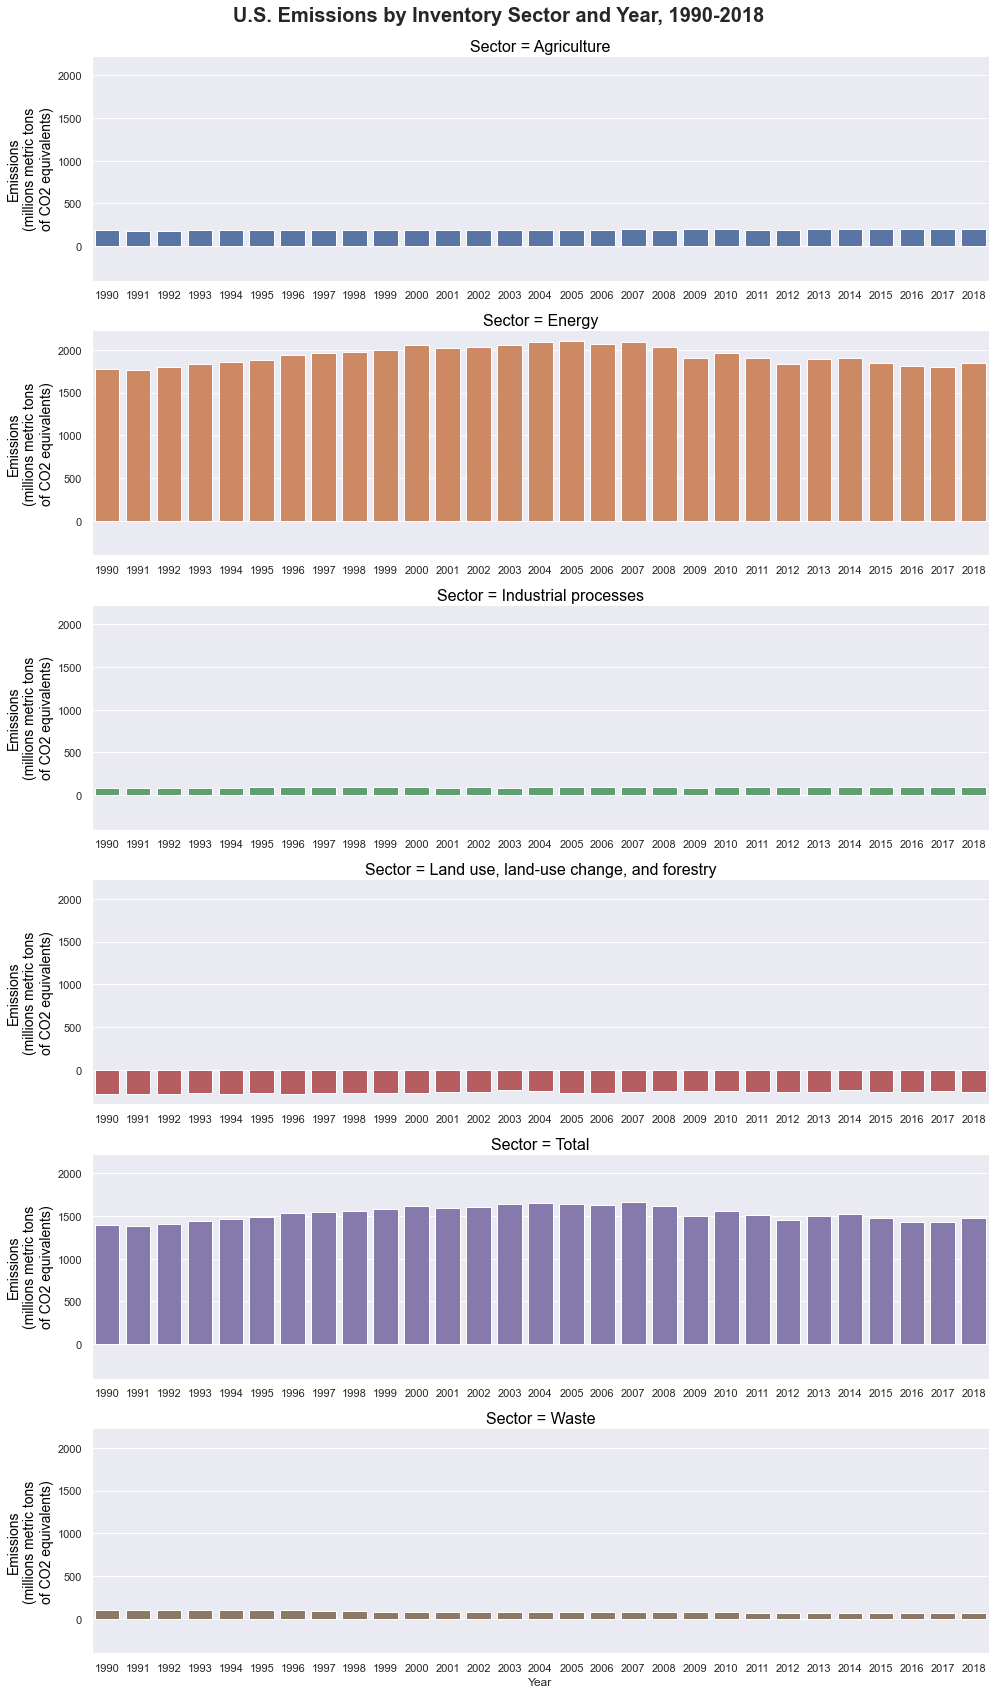

In [78]:
g = sns.FacetGrid(ghg_inv_sectors_long_df.sort_values(['Sector', 'Gas', 'Year']),
                  row="Sector", hue="Sector", height=4, aspect=3.5, sharex=False)
g.map(sns.barplot, "Year", "Emissions", order=list(range(1990,2019)), ci=None)

plt.subplots_adjust(top=0.90)
g.fig.suptitle('U.S. Emissions by Inventory Sector and Year, 1990-2018\n', fontsize=20, fontweight='bold')

axes = g.axes.flatten()
for ax in axes:
    ax.set_title(ax.get_title(),
                 fontdict={'family':'Arial', 'color':'black', 'weight':'normal', 'size':16})
    ax.set_ylabel(ylabel="Emissions\n(millions metric tons\nof CO2 equivalents)",
                  fontdict={'family':'Arial', 'color':'black', 'weight':'normal', 'size':14})

plt.tight_layout()
plt.show()
plt.clf()
plt.close()

## Plot with Facets and Hue: All Groups

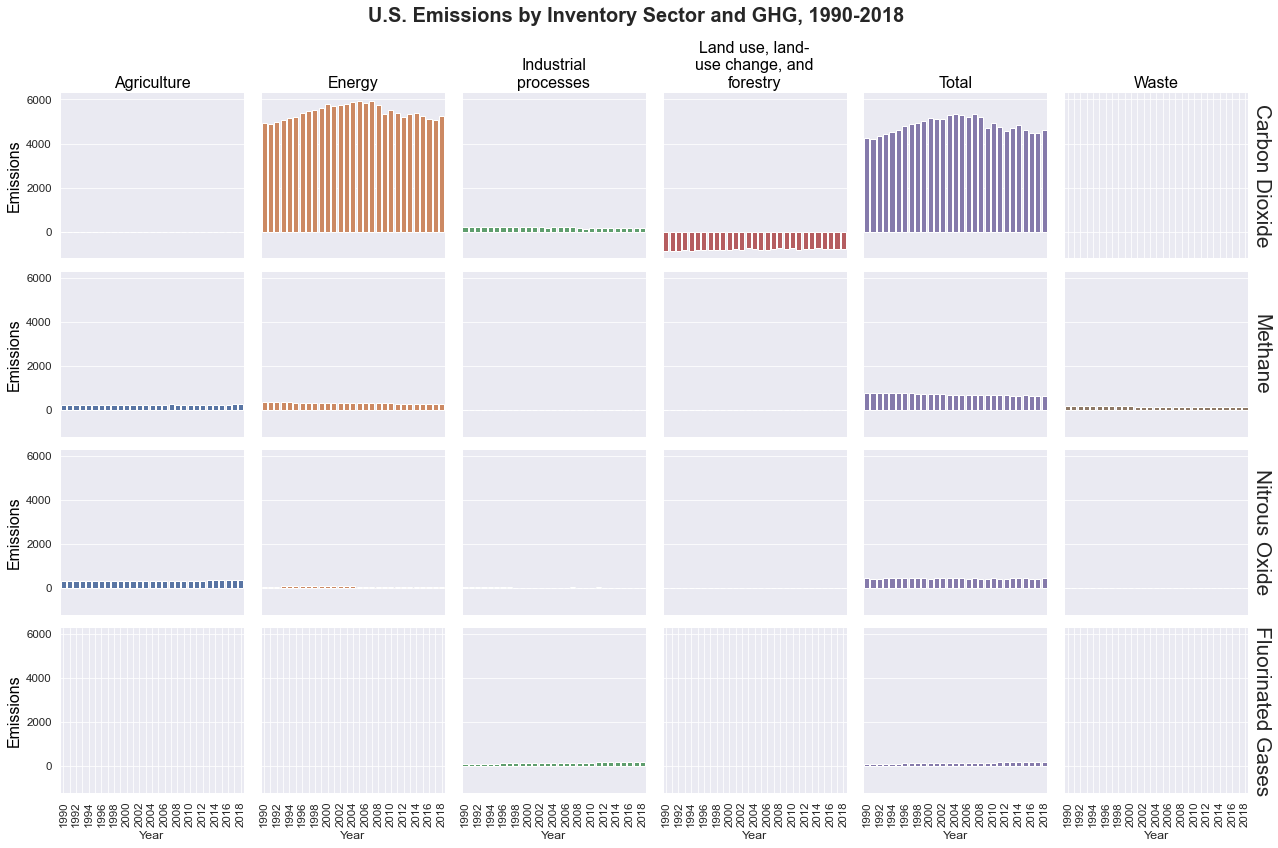

In [79]:
ghg_inv_sectors_long_df['Sector'] = ghg_inv_sectors_long_df['Sector'].apply(lambda x: "\n".join(wrap(x, 16)));

with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(ghg_inv_sectors_long_df.sort_values(['Sector', 'Gas', 'Year']),
                      row="Gas", col="Sector", hue="Sector", margin_titles=True)

g.map(sns.barplot, "Year", "Emissions", order=list(range(1990,2019)), ci=None)
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels("Year", "Emissions")

axes = g.axes.flatten()
for ax in axes:
    ax.set_title(ax.get_title(),
                 fontdict={'family':'Arial', 'color':'black', 'weight':'normal', 'size':16})
    ax.set_ylabel(ax.get_ylabel(),
                  fontdict={'family':'Arial', 'color':'black', 'weight':'normal', 'size':16})

    labels = ax.get_xticklabels()                  
    newlabels = [l if(i%2 == 0) else '' for i, l in enumerate(labels)]              
    ax.set_xticklabels(newlabels, rotation=90)       

    if ax.texts:
        txt = ax.texts[0]                          # This contains the right ylabel text
        ax.text(txt.get_unitless_position()[0], 
                txt.get_unitless_position()[1],
                txt.get_text(),
                transform=ax.transAxes,
                va='center',
                fontsize='xx-large',
                rotation=-90)        
        ax.texts[0].remove()                       # Remove the original text

g.fig.tight_layout()

plt.subplots_adjust(top=0.88)
g.fig.suptitle('U.S. Emissions by Inventory Sector and GHG, 1990-2018\n', fontsize=20, fontweight='bold')
plt.show()
plt.clf()
plt.close()